In [1]:
import read_bayesnet
from read_bayesnet import BayesianNetwork, Variable
import pandas as pd

In [2]:
bn = BayesianNetwork(file='asia.bif')  # example usage for the supplied earthquake.bif file
for v in bn.variables:
    print('node : ',v.name,'\nparents : ',v.parents,'\nmarkov blanket : ',v.markov_blanket,'\nprobs : ',v.probabilities,'\n')

node :  asia 
parents :  [] 
markov blanket :  ['tub'] 
probs :  {'yes': 0.01, 'no': 0.99} 

node :  tub 
parents :  ['asia'] 
markov blanket :  ['lung', 'asia', 'either'] 
probs :  {('yes',): {'yes': 0.05, 'no': 0.95}, ('no',): {'yes': 0.01, 'no': 0.99}} 

node :  smoke 
parents :  [] 
markov blanket :  ['bronc', 'lung'] 
probs :  {'yes': 0.5, 'no': 0.5} 

node :  lung 
parents :  ['smoke'] 
markov blanket :  ['either', 'tub', 'smoke'] 
probs :  {('yes',): {'yes': 0.1, 'no': 0.9}, ('no',): {'yes': 0.01, 'no': 0.99}} 

node :  bronc 
parents :  ['smoke'] 
markov blanket :  ['dysp', 'either', 'smoke'] 
probs :  {('yes',): {'yes': 0.6, 'no': 0.4}, ('no',): {'yes': 0.3, 'no': 0.7}} 

node :  either 
parents :  ['lung', 'tub'] 
markov blanket :  ['bronc', 'tub', 'xray', 'dysp', 'lung'] 
probs :  {('yes', 'yes'): {'yes': 1.0, 'no': 0.0}, ('no', 'yes'): {'yes': 1.0, 'no': 0.0}, ('yes', 'no'): {'yes': 1.0, 'no': 0.0}, ('no', 'no'): {'yes': 0.0, 'no': 1.0}} 

node :  xray 
parents :  ['either'

# Running the algorithm with different iterations

{'asia': 'yes', 'tub': 'yes', 'smoke': 'no', 'lung': 'no', 'bronc': 'yes', 'either': 'no', 'xray': 'yes', 'dysp': 'yes'}


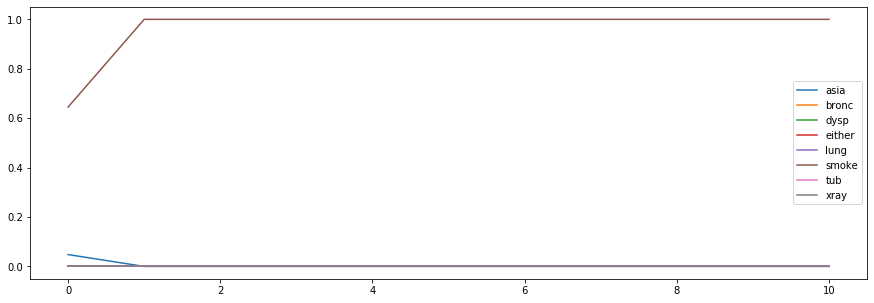

In [6]:
res, df = bn.gibbs_sampling(iterations=1,warm_up=10)
df.plot(figsize=(15,5))

In [ ]:
res

In [ ]:
res, df = bn.gibbs_sampling(iterations=10)
df.plot(figsize=(15,5))

In [ ]:
res, df = bn.gibbs_sampling(iterations=20000)
df.plot(figsize=(15,5))

# Running the algorithms many times so it uses different samples

In [ ]:
df = pd.DataFrame()

for i in range(20):
    results, _ = bn.gibbs_sampling(iterations=1)
    df= df.append(results,ignore_index=True)
    print(i,end='\r')
    
df = df.applymap(lambda x : x['yes'])
df.plot(figsize=(15,5))

In [ ]:
' '.join(['ola','ole'])